# Practical Session 1

### IMPORTING libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

##  1 Datasets

### Temperature dataset

In [2]:
temperPath = "/Users/martialgil/Desktop/COURS/Master data IP/P1/practical introduction to ML/TP/TP1/data/temper.npz"
digitPath="/Users/martialgil/Desktop/COURS/Master data IP/P1/practical introduction to ML/TP/TP1/data/digits.npz"

In [3]:
temperNumpy = np.load(temperPath)
temperNumpy['data']

array([[ 5.6 ,  6.6 , 10.3 , 12.8 , 15.8 , 19.3 , 20.9 , 21.  , 18.6 ,
        13.8 ,  9.1 ,  6.2 , 44.5 , -0.34],
       [ 6.1 ,  5.8 ,  7.8 ,  9.2 , 11.6 , 14.4 , 15.6 , 16.  , 14.7 ,
        12.  ,  9.  ,  7.  , 48.2 , -4.29],
       [ 2.6 ,  3.7 ,  7.5 , 10.3 , 13.8 , 17.3 , 19.4 , 19.1 , 16.2 ,
        11.2 ,  6.6 ,  3.6 , 45.5 ,  3.05],
       [ 1.5 ,  3.2 ,  7.7 , 10.6 , 14.5 , 17.8 , 20.1 , 19.5 , 16.7 ,
        11.4 ,  6.5 ,  2.3 , 45.1 ,  5.43],
       [ 2.4 ,  2.9 ,  6.  ,  8.9 , 12.4 , 15.3 , 17.1 , 17.1 , 14.7 ,
        10.4 ,  6.1 ,  3.5 , 50.4 ,  3.04],
       [ 2.1 ,  3.3 ,  7.7 , 10.9 , 14.9 , 18.5 , 20.7 , 20.1 , 16.9 ,
        11.4 ,  6.7 ,  3.1 , 45.5 ,  4.51],
       [ 5.5 ,  6.6 , 10.  , 13.  , 16.8 , 20.8 , 23.3 , 22.8 , 19.9 ,
        15.  , 10.2 ,  6.9 , 43.2 ,  5.24],
       [ 5.6 ,  6.7 ,  9.9 , 12.8 , 16.2 , 20.1 , 22.7 , 22.3 , 19.3 ,
        14.6 , 10.  ,  6.5 , 43.4 ,  3.53],
       [ 5.  ,  5.3 ,  8.4 , 10.8 , 13.9 , 17.2 , 18.8 , 18.6 , 16.4 ,
        1

**comment :** We can see temperatures series across time. The two last features are the position of the city, let's check with pandas some information about features !

In [4]:
temperNumpy['villes']

array(['Bordeaux', 'Brest', 'Clermont-Ferrand', 'Grenoble', 'Lille',
       'Lyon', 'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris',
       'Rennes', 'Strasbourg', 'Toulouse', 'Vichy'], dtype='<U16')

**comment :** This data package contains all cities, It is big French cities that recover a big part of the territory

In [5]:
temperNumpy['varname']

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Latitude', 'Longitude'], dtype='<U9')

**comment :** This data package contains names of features. We have months names and latitude and longitude

In [6]:
temperNumpy = np.load(temperPath)
temperDataPD = pd.DataFrame(temperNumpy['data'], columns = temperNumpy['varname'])
temperDataPD.set_index(temperNumpy['villes'])
print()

In [7]:
temperDataPD.describe()

,January,February,March,April,May,June,July,August,September,October,November,December,Latitude,Longitude
count,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.973333,4.833333,8.233333,10.98000,14.433333,17.833333,19.833333,19.566667,16.986667,12.320000,7.926667,4.846667,46.053333,2.583333
std,2.007296,1.868409,1.529083,1.41482,1.504596,1.793507,2.128939,2.011988,1.848114,1.829988,1.803753,1.958449,2.290935,3.318136
min,0.400000,1.500000,5.600000,8.90000,11.600000,14.400000,15.600000,16.000000,14.700000,9.500000,4.900000,1.300000,43.200000,-4.290000
25%,2.400000,3.350000,7.550000,10.00000,13.700000,17.150000,18.900000,18.450000,15.850000,11.300000,6.600000,3.450000,43.950000,0.460000
50%,4.700000,5.300000,7.800000,10.70000,14.300000,17.500000,19.400000,19.100000,16.400000,11.600000,7.800000,5.400000,45.500000,3.050000
75%,5.550000,6.200000,9.550000,12.20000,15.350000,19.000000,20.900000,20.950000,18.450000,13.550000,9.050000,6.350000,48.150000,4.875000
max,7.500000,8.500000,10.800000,13.30000,16.800000,20.800000,23.300000,22.800000,20.300000,16.000000,11.500000,8.200000,50.400000,7.450000


**comment :** We can observe that there is two slopes (from Janueary to August, it increases; then from August to December, it decreases), it is the seasonal phenomenon that we all know. Variance is approximately stable between features (between 1.4 and 2.3).

In [8]:
temperData= temperNumpy["data"]
features= temperNumpy["varname"]
villes= temperNumpy["villes"]

In [9]:
features=features[:12]

In [10]:
temperatureData= temperData[:,:12]

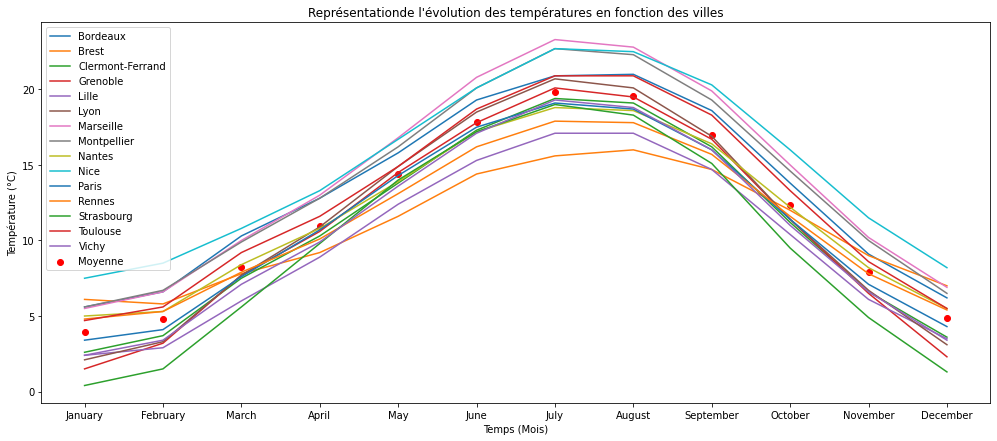

In [11]:
plt.figure(figsize=(17,7))
plt.plot(features,np.transpose(temperatureData),label = villes)
pl.title("Représentationde l'évolution des températures en fonction des villes")
pl.xlabel('Temps (Mois)')
pl.ylabel('Température (°C)')
plt.scatter(features,temperatureData.mean(axis=0), label ="Moyenne",c="red")
plt.legend()

**comment :** This graph is really interesting. Indeed, we can see thar cities temperatures follow the same path, that is expected. We can also observe that cities don't cross each others temperature lines too much. Furthermore, we can see that south city are on the high part of all this curves, instead of north cities are on the low part (as expected).

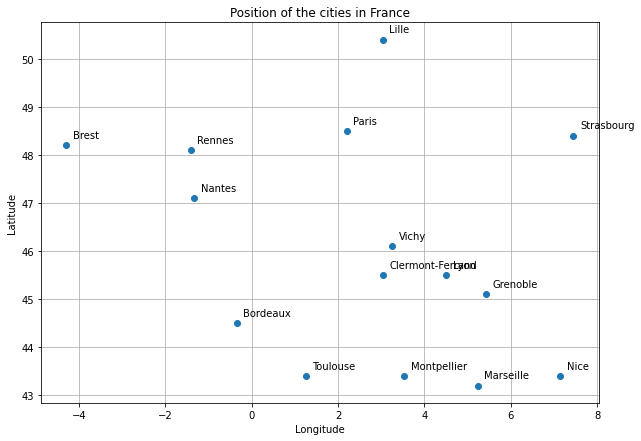

In [12]:
 # Reproducing the first figure
lat = temperData[:,12]
long = temperData[:,13]
pl.figure(figsize = (10,7))
pl.scatter(long, lat)
pl.grid()
pl.title('Position of the cities in France')
pl.xlabel('Longitude')
pl.ylabel('Latitude')
for i in range(15):
    pl.annotate(villes[i], (long[i], lat[i]),xytext = (long[i] + 0.15, lat[i] +0.15))

**comment :** This graph show positions of cities in France. It don't really look like of the real position of our cities, this is due that scale of the axe X and the axe Y are not the same. However, we can observe cities are in a good relative position (as expected)

### Digit dataset 

In [13]:
digitNumpy = np.load(digitPath)
digit =digitNumpy['xt']/255
y=digitNumpy['yt']

In [14]:
digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**comment :** This dataset contains all information about pixels of each features. Like that, we can't interpret anything, let's do some interpretations by printing some pictures!

In [15]:
y

array([[1],
       [1],
       [1],
       ...,
       [8],
       [8],
       [8]], dtype=uint8)

**comment :** Here is the label of each features, we have 1, 7 and 8 as label in our image dataset

In [16]:
digit1 = digit[0:500 , :]
digit7 = digit[500:1000 , :]
digit8 = digit[1000:1500 , :]

(-0.5, 27.5, 27.5, -0.5)

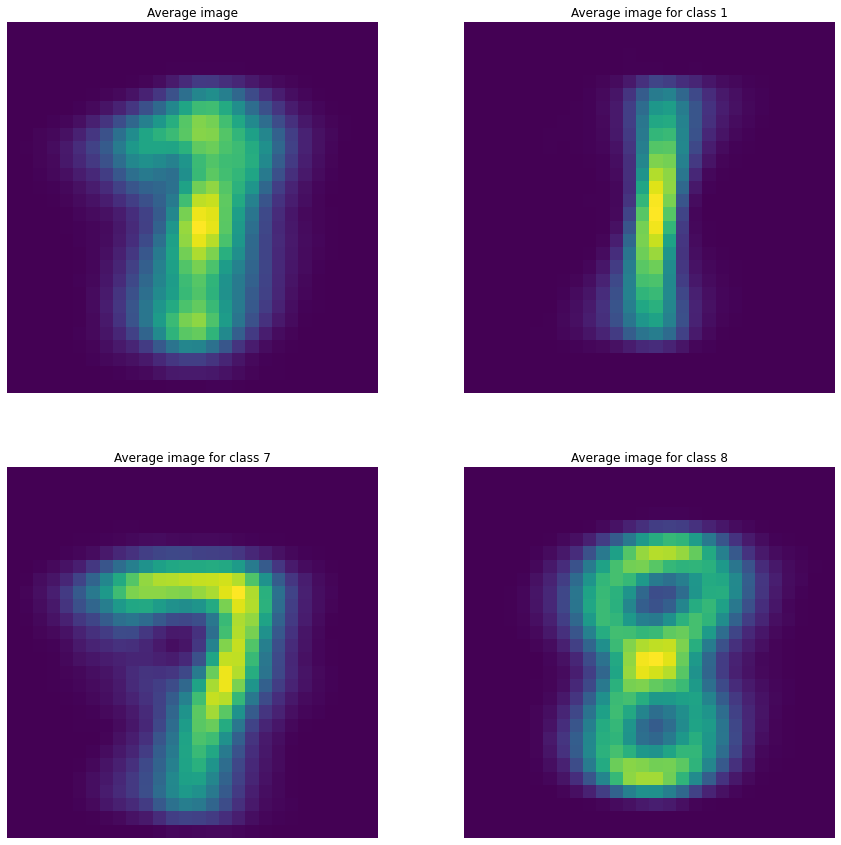

In [17]:
average_digit =np.mean(digit, axis=0)
average_digit_1 = np.mean(digit1, axis=0)
average_digit_7 = np.mean(digit7, axis=0)
average_digit_8 = np.mean(digit8, axis=0)


plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.imshow(average_digit.reshape(28, 28))
plt.title('Average image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(average_digit_1.reshape(28, 28))
plt.title('Average image for class 1')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(average_digit_7.reshape(28, 28))
plt.title('Average image for class 7')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(average_digit_8.reshape(28, 28))
plt.title('Average image for class 8')
plt.axis('off')

**comment :** Here I printed the average image of each category of numbers. The first one is the average of all of them. We can have really interesting interpretation. Indeed, only the center part of the picture contains real information, so pixels all around this center, are useless. For the others pictures, it is really interesting because we can really distinguish the number of their class (hopefully). 

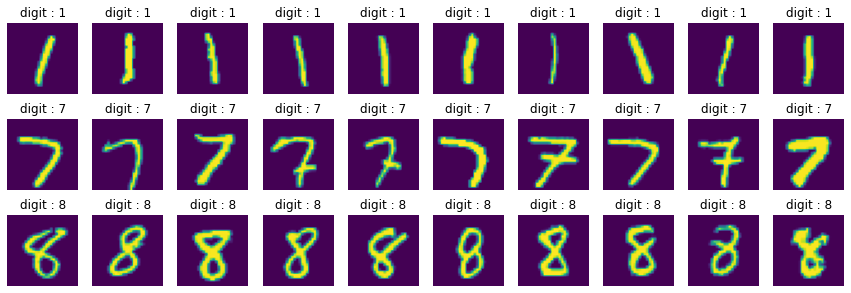

In [18]:
plt.figure(figsize = (15,5))

for typeImage in range(3):
    nombre=1
    if typeImage==1:
        nombre=7
    if typeImage==2:
        nombre=8
    for photo in range(10):
        plt.subplot(3, 10, (typeImage)*10+1+photo)
        plt.imshow(digit[typeImage*500+photo+1].reshape(28, 28))
        
        plt.title('digit : '+str(nombre))
        plt.axis('off')

**comment :** Here I have printed some samples from the dataset. We can see that for the 8, there are really different types of ways for writting numbers. We can clearly distinguish all of them, but there are some 7 that could look like 1. 8 are really easy to distinguish. Furthermore, there are two ways to write a 7, with a middle bar and without.

# 2 Clustering

### 2.1 For both datasets

1. Perform K-means clustering on the data (K = 3, sklearn.cluster.Kmeans) and store the cluster centroids and the estimated classes for all samples.

In [19]:
kmeansTemperature = KMeans(n_clusters=3).fit(temperatureData)


In [20]:
yTemperatureCluster=kmeansTemperature.predict(temperatureData)
C=kmeansTemperature.cluster_centers_ #store the cluster centroids

2. Plot the centroids and interpret them (how are the samples clustered? by class on digits? geographical position for the cities?).

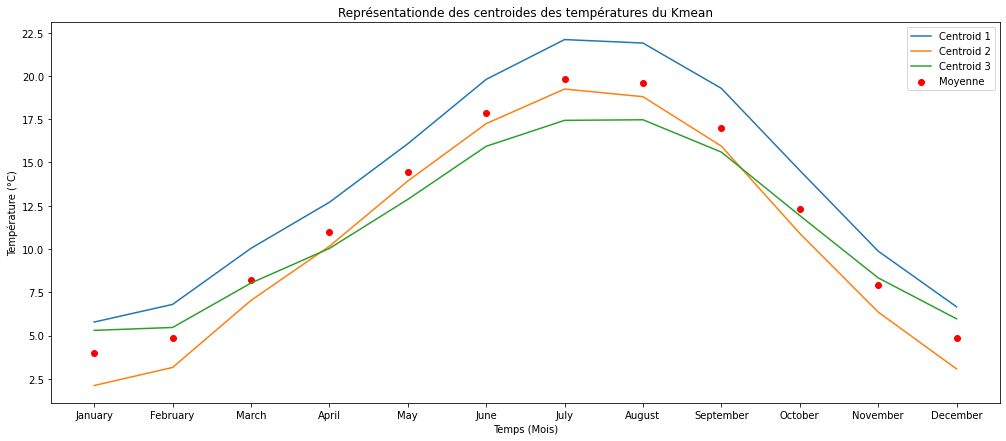

In [21]:
plt.figure(figsize=(17,7))
plt.plot(features,np.transpose(C),label = ["Centroid 1","Centroid 2","Centroid 3"])
pl.title("Représentationde des centroides des températures du Kmean")
pl.xlabel('Temps (Mois)')
pl.ylabel('Température (°C)')
plt.scatter(features,temperatureData.mean(axis=0), label ="Moyenne",c="red")
plt.legend()

**comment :** The plot of centroids show the type of profile of each cluster. The highest cluster is the one with hot weather, it follows the same trend that the "Moyenne". We have another cluster who follows the same trend but it is a little bit lower than the "moyenne". The last centroid don't have the same trend than the others, it has is own trend, it has to be a specific climate.

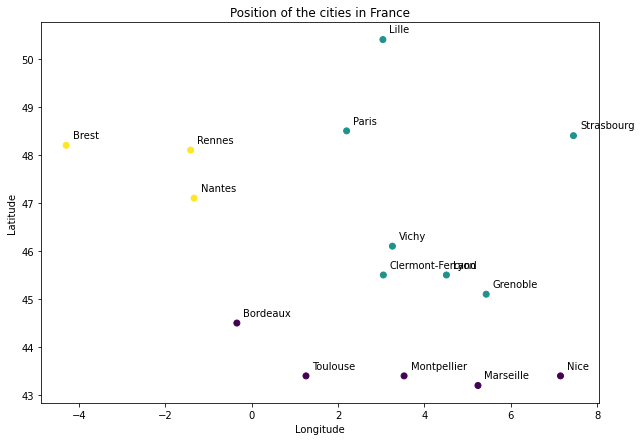

In [22]:
lat = temperData[:,12]
long = temperData[:,13]
pl.figure(figsize = (10,7))
plt.scatter(long,lat,c=yTemperatureCluster)
pl.title('Position of the cities in France')
pl.xlabel('Longitude')
pl.ylabel('Latitude')
for i in range(15):
    
    pl.annotate(villes[i], (long[i], lat[i]),xytext = (long[i] + 0.15, lat[i] +0.15))

**comment :** Here i printed the cities with their cluster (each color represents a cluster). We see Kmeans is working pretty well, because, we have clusters that are geographical near. In fact, there is a cluster in the south of France, one more in center-north, and one in ouest. It is really good because each of this city has a similar weather environment. Furthermore, one interesting thing to underline it is that the position of cities aren't in the dataset, but with only temperature, we find "temperature" geographical pattern.

3. Change the value of K and repeat the two previous steps. What are good values in your opinion and why?

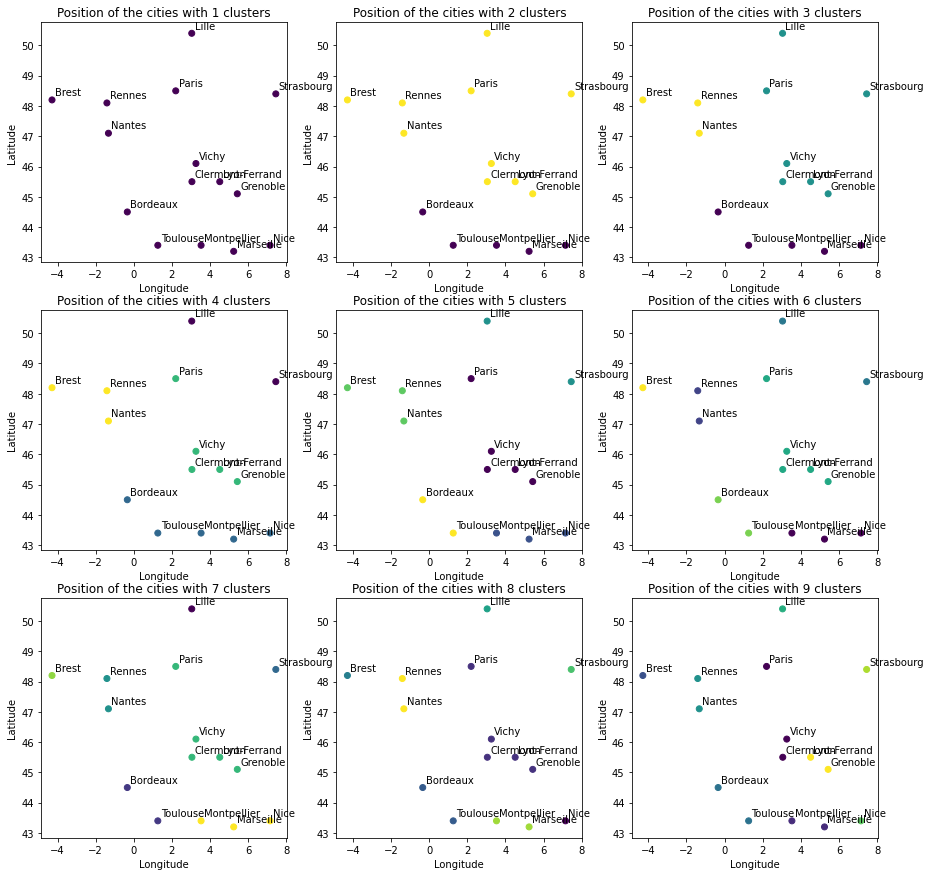

In [23]:
plt.figure(figsize = (15,15))
nombreClusteter=1
for ligne in range(3):
    for colonne in range(3):
        kmeansTemperature = KMeans(n_clusters=nombreClusteter).fit(temperatureData)
        yTemperatureCluster=kmeansTemperature.predict(temperatureData)
        plt.subplot(3, 3, (ligne)*3+1+colonne)
        lat = temperData[:,12]
        long = temperData[:,13]
        plt.scatter(long,lat,c=yTemperatureCluster)
        titre ='Position of the cities with '+str(nombreClusteter)+' clusters'
        pl.title(titre)
        pl.xlabel('Longitude')
        pl.ylabel('Latitude')
        for i in range(15):

            pl.annotate(villes[i], (long[i], lat[i]),xytext = (long[i] + 0.15, lat[i] +0.15))
        nombreClusteter+=1


**comment :** Here I have printed the same graph as before, but I have changed the number of clusters (it is a variable in the Kmeans algorithm). Here we have a small number of cities, so this ridiculous to choose a large number of clusters. Personaly, I think the best k to choose is 4. Indeed, the clustering is more accurate than 3, but it keeps a sense. We have four zone : South, West,Center-Est,Est-North

##### 2.2 Temperature dataset

1. Look at the name of the cities in each clusters. Do the clustering make sens?

**comment :** Answer already done before : I rewrite it just above if needed

**comment :** Here I printed the cities with their cluster (each color represents a cluster). We see Kmeans is working pretty well, because, we have clusters that geographic near. In fact, there is a cluster in the south of France, one more in center-north, and one in ouest. It is really good because each of this city has a similar weather environment. Furthermore, one interesting thing to underline it is that the position of cities aren't in the dataset, but with only temperature we find "temperature" geographical pattern.Comment : to do

2. Plot the cities with a scatterplot using their geographical position and using the estimated class as color. Do the K-means clustering on temperature recover a geographical similarity between cities? Why?

**comment :** Answer already done before : I complete it a bit to answer the full question

**comment :** Yes, the K-means clustering on temperature recover a geographical similarity between cities because their weather depends on their geographical place in France. In fact, more you are near to equateur, more the weather is hot, this why the souht of france cities are together(meditarean climate). In West, you have the specific oceanic climate. For other cities, you have a continental climate. 
This why we have the K-means clustering on temperature recovers a geographical similarity between cities

# 2.3 Digits dataset

1. Perform K-means clustering on the data (K = 3, sklearn.cluster.Kmeans) and store the cluster centroids and the estimated classes for all samples.

In [24]:
kmeansDigits = KMeans(n_clusters=3).fit(digit)
yDigitCluster =kmeansDigits.predict(digit)

In [25]:
clusterDigit=kmeansDigits.cluster_centers_#centroids
digitReshape=clusterDigit.reshape(clusterDigit.shape[0], 28, 28, 1)#we reshape in order to plot it
labels_digit = kmeansDigits.labels_

2. Plot the centroids and interpret them (how are the samples clustered? by class on digits? geographical position for the cities?).

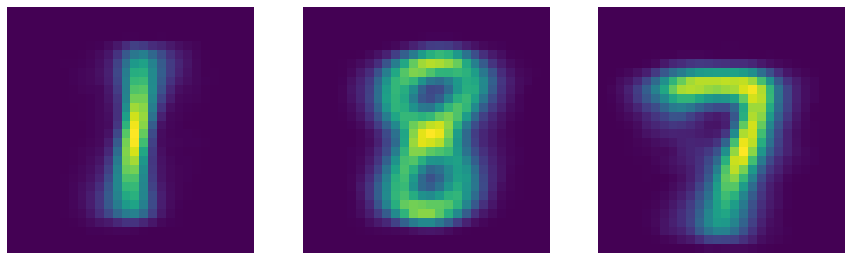

In [26]:
plt.figure(figsize = (15,15))
 
for k in range(3): 
    plt.subplot(1,3,1+k)
    plt.imshow(digitReshape[k])
    plt.axis('off')

**comment :** The printing of centroid of each cluster is really interesting because we could observe that each cluster reprent a number (1,8 and 7). It shows that the clustering has worked well, because  these numbers have specific features (not in sense of a column), so it is expected that each type of numbers are gathered in a same cluster 

3. Change the value of K and repeat the two previous steps. What are good values in your opinion and why?

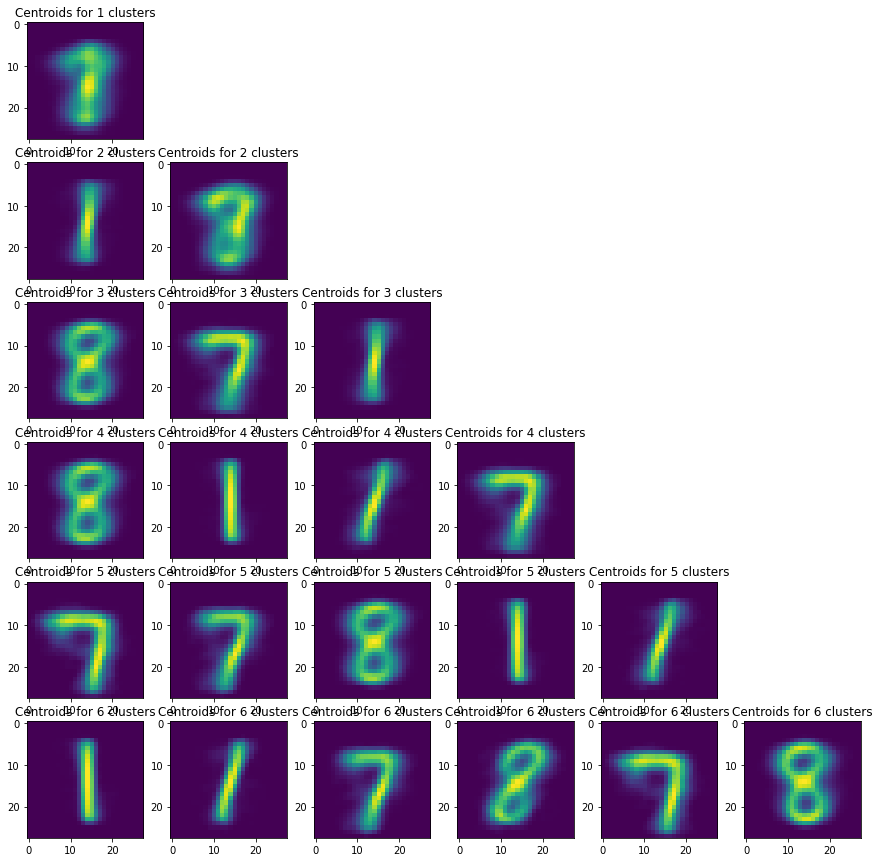

In [27]:
plt.figure(figsize = (15,15))
for ligne in range(6):
    kmeansDigits = KMeans(n_clusters=ligne+1).fit(digit)
    clusterDigit=kmeansDigits.cluster_centers_#centroids
    
    for colonne in range(ligne+1):
        plt.subplot(6, 6, (ligne)*6+1+colonne)
        plt.imshow(clusterDigit[colonne].reshape(28, 28))
        titre ='Centroids for '+str(ligne+1)+' clusters'
        pl.title(titre)
        
        


**comment :** I print all the centroids for a number from 1 to 6 of clusters. Before k=3, it is not interesting because the algorithm has not enough clusters in order to put each type of number in a cluster (with their own label). After, we could see that Kmeans is creating clustering for subdivision of type of number for each class. For example, for k=4, we have two cluster for 1, with "1" with straight writing, and an other one that is inclined.

1. Does the clusters resemble a true image from the dataset ? Could you tell if a cluster centroid is a true image. Why ?

**comment :** Answer already done before : I rewrite it just above if needed

**comment :** The printing of centroid of each cluster is really interesting because we could observe that each cluster reprent a number (1,8 and 7). It shows that the clustering has worked well, because  these numbers have specific features (not in sense of a column), so it si expected that each type of numbers are gathered in a same cluster 

2. Plot the predicted labels (as a signal). Since the samples are ordered by class in the dataset, a clustering respecting the true class should be piecewise constant. Is that the case?


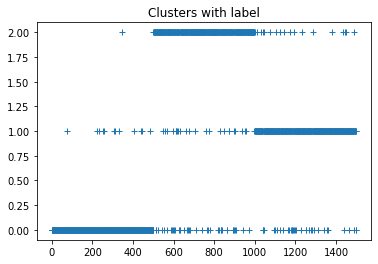

In [28]:
plt.title('Clusters with label')
plt.plot(labels_digit,  linestyle = 'None', marker='+')

**comment :** We can clearly see as expected that the most of digit are well "clustered" together (fat line by level between 0-500,500-1000,1000-1500). But we could clearly that is not perfect, because we see that there are some digit that aren't in the good cluster. We can notice that 1 is the most dificult to label. In the next part, we could quantify how good is the clustering.

3. Compute the quality of the clustering using the ground truth labels (sklearn.metric.rand_score, sklearn.metric.adjusted_rand_score).


In [29]:
kmeansDigits = KMeans(n_clusters=3).fit(digit)
yDigitCluster =kmeansDigits.predict(digit)
print("rand score :",rand_score(yDigitCluster,np.transpose(y)[0]))
print("adjusted rand score :",adjusted_rand_score(yDigitCluster,np.transpose(y)[0]))

rand score : 0.8953150989548588
adjusted rand score : 0.764734260036024


**comment :** Here we have really good performance, we can say that the K-means is a really good clustering algorithm for this dataset.

4. See the effect of the parameter K on the clustering score. What is the K that leads to the best score? Why

In [30]:
kmeansDigits = KMeans(n_clusters=5).fit(digit)
yDigitCluster =kmeansDigits.predict(digit)
print("rand score :",rand_score(yDigitCluster,np.transpose(y)[0]))
print("adjusted rand score :",adjusted_rand_score(yDigitCluster,np.transpose(y)[0]))

rand score : 0.8291038470091172
adjusted rand score : 0.5792465837084189


In [31]:
liste_rand_score=[]
liste_adjusted_rand_score=[]

for numberCluster in range(10):
    kmeansDigits = KMeans(n_clusters=numberCluster+1).fit(digit)
    yDigitCluster =kmeansDigits.predict(digit)
    liste_rand_score.append(rand_score(yDigitCluster,np.transpose(y)[0]))
    liste_adjusted_rand_score.append(adjusted_rand_score(yDigitCluster,np.transpose(y)[0]))

Text(0, 0.5, 'adjusted_rand_score')

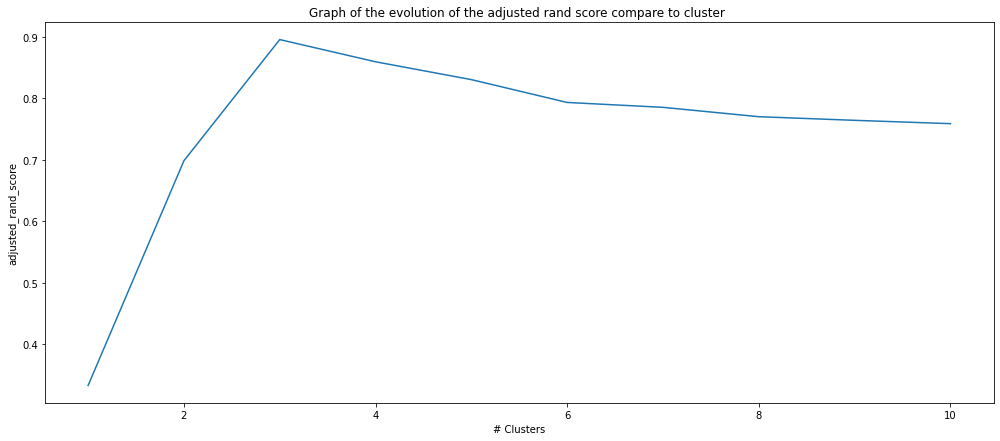

In [32]:
plt.figure(figsize=(17,7))
x_Axis = np.linspace(1, 10, num=10)
plt.plot(x_Axis,liste_rand_score)
plt.title("Graph of the evolution of the adjusted rand score compare to cluster ")
pl.xlabel('# Clusters')
pl.ylabel('adjusted_rand_score')

Text(0, 0.5, 'adjusted_rand_score')

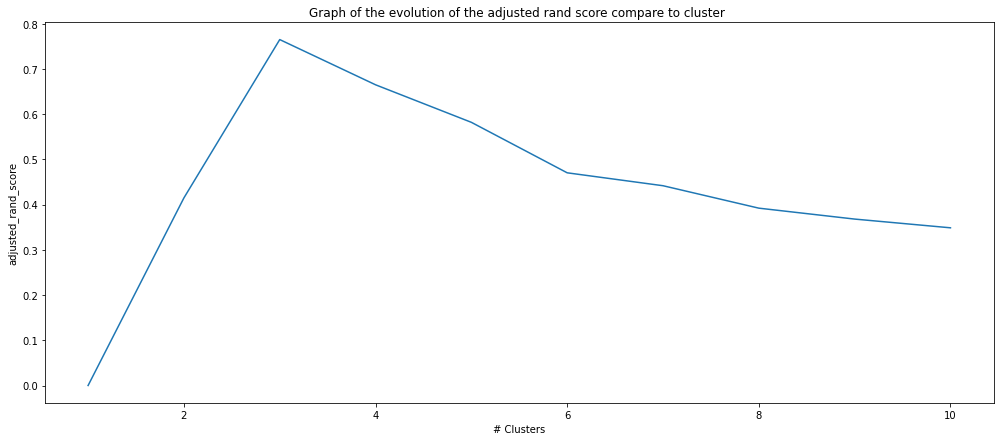

In [33]:
plt.figure(figsize=(17,7))
x_Axis = np.linspace(1, 10, num=10)
plt.plot(x_Axis,liste_adjusted_rand_score)
plt.title("Graph of the evolution of the adjusted rand score compare to cluster ")
pl.xlabel('# Clusters')
pl.ylabel('adjusted_rand_score')

**comment :** The graphs are logic. Indeed, before having 3 clusters, you can't have a good classifier because there is less than one centroid per label. When you outrun k=3, your accuracy is decreasing because you have more centroids than labels, so for example for k=4, you have two "1" centroids. So you would have a bad accuracy in each of these centroids.


# 3 Density estimation

# Temper

1. Estimate a GMM density on the data with K = 2 for temperature and K = 3 for digits (sklearn. mixture.GaussianMixture). Due to the relatively high dimensional data and small number of samples we will estimate GMM with diagonal covariances (covariance_type=’diag’).

In [34]:
gaussianTemper = GaussianMixture(n_components=2, covariance_type='diag') 
gaussianTemper_fit=gaussianTemper.fit(temperatureData)
yGaussianTemper = gaussianTemper.predict(temperatureData)
centroidsGaussianTemper = gaussianTemper.means_

2. Plot the centers of the Gaussian distributions in the mixture and interpret them.

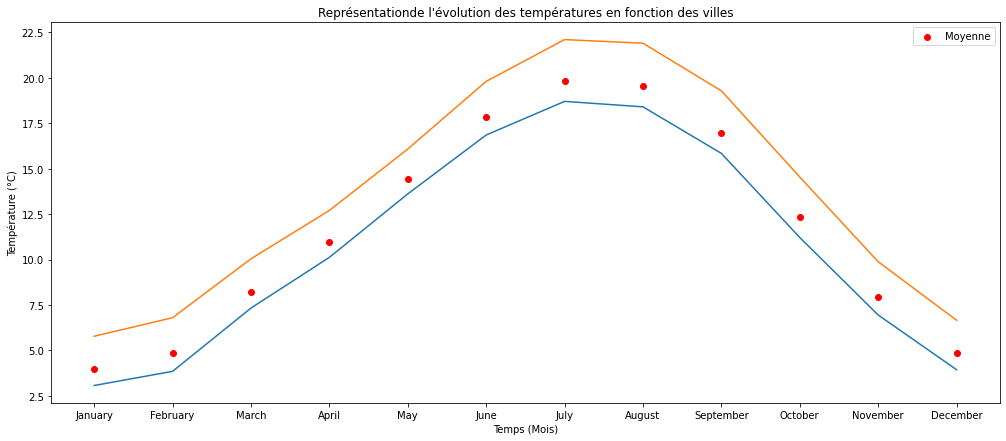

In [35]:

plt.figure(figsize=(17,7))
plt.plot(features,np.transpose(centroidsGaussianTemper))
pl.title("Représentationde l'évolution des températures en fonction des villes")
pl.xlabel('Temps (Mois)')
pl.ylabel('Température (°C)')
plt.scatter(features,temperatureData.mean(axis=0), label ="Moyenne",c="red")
plt.legend()

**comment :** This graph is really good, because we can see centroids gaussiant temperatures are each one in a different part of the mean. 

3. Change the value of K and repeat the two previous steps. What are good values in your opinion and why? Change the shape of the covariance, how well are they estimated on both datasets?

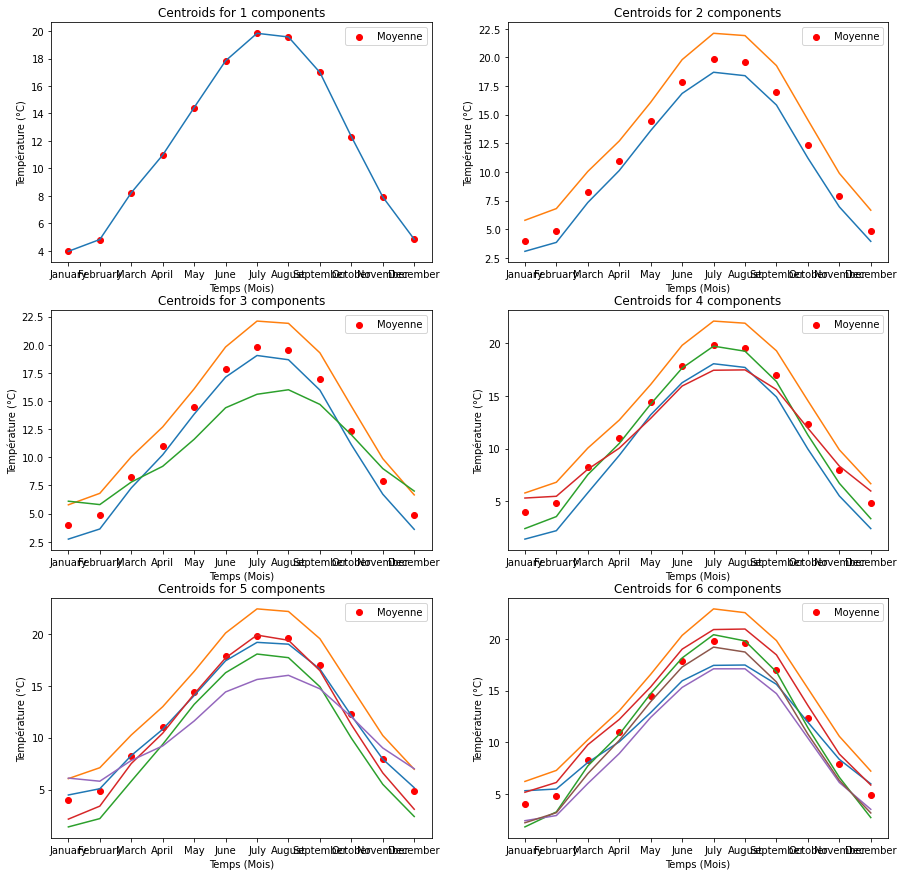

In [36]:
plt.figure(figsize = (15,15))
numberC=1
for ligne in range(3):

    for colonne in range(2):
        gaussianTemper = GaussianMixture(n_components=(numberC), covariance_type='diag') 
        gaussianTemper=gaussianTemper.fit(temperatureData)
        centroidsGaussianTemper = gaussianTemper.means_
        plt.subplot(3, 2, (ligne)*2+1+colonne)
        plt.plot(features,np.transpose(centroidsGaussianTemper))
        pl.title("Centroids for "+ str(numberC)+ " components")
        pl.xlabel('Temps (Mois)')
        pl.ylabel('Température (°C)')
        plt.scatter(features,temperatureData.mean(axis=0), label ="Moyenne",c="red")
        plt.legend()
        numberC+=1
        

**comment :** I think the good value us 2. Indeed, we have a really little dataset, so we can't take a high value. 3 is a simple value, but this is the only value where I can understand properly the two distributions found.

4. Compute the log probability of the samples for the estimated density (model.score_samples(x)). Recover the samples with the smallest score (probability) and plot them. They can be considered as outliers for the distribution (least probable samples). Wan you see why?


In [37]:
gaussianTemper = GaussianMixture(n_components=2, covariance_type='diag') 
gaussianTemper_fit=gaussianTemper.fit(temperatureData)

scores_temper = gaussianTemper.score_samples(temperatureData)
outliers_tempers = np.argsort(scores_temper)[:3]
#print(outliers_tempers)
print("Les outliers sont : "+ str(temperNumpy["villes"][outliers_tempers]))
    
    

Les outliers sont : ['Brest' 'Strasbourg' 'Toulouse']


**comment :** I think this not really relevant to talk about outliers when you have a so litte dataset. However Brest is a good choice because I know they have a "micro climat", so it could be relevant to think it is an outlier

# digits

1. Estimate a GMM density on the data with K = 2 for temperature and K = 3 for digits (sklearn. mixture.GaussianMixture). Due to the relatively high dimensional data and small number of samples we will estimate GMM with diagonal covariances (covariance_type=’diag’).

In [38]:
gaussianDigit = GaussianMixture(n_components=3, covariance_type='diag') 
gaussianDigit_fit=gaussianDigit.fit(digit)
yGaussianDigit = gaussianDigit.predict(digit)
centroidsGaussianDigit = gaussianDigit.means_

2. Plot the centers of the Gaussian distributions in the mixture and interpret them.

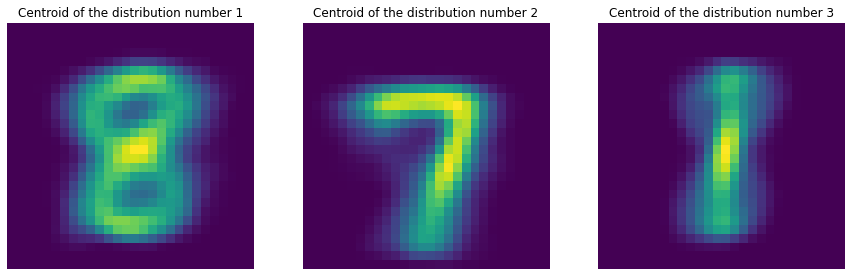

In [39]:
plt.figure(figsize = (15,15))
for i,centroid in  enumerate(centroidsGaussianDigit) :
    plt.subplot(1,3,1+i)
    plt.imshow(centroid.reshape(28, 28))
    plt.axis("off")
    plt.title("Centroid of the distribution number "+ str(i+1))


**comment :** I have plot centroids of each "cluster". Here we have blurry image(it is normal for centroids), and we can clearly recognize the label of each centroid. One interesting point is that we can recognize the shape of 8 in the "1" centroid, so we can assume this clustering is less effective than the previous one. In order to be sure of this last statement, we are going to compute rand score in order to confirm it.

3. Change the value of K and repeat the two previous steps. What are good values in your opinion and why? Change the shape of the covariance, how well are they estimated on both datasets?

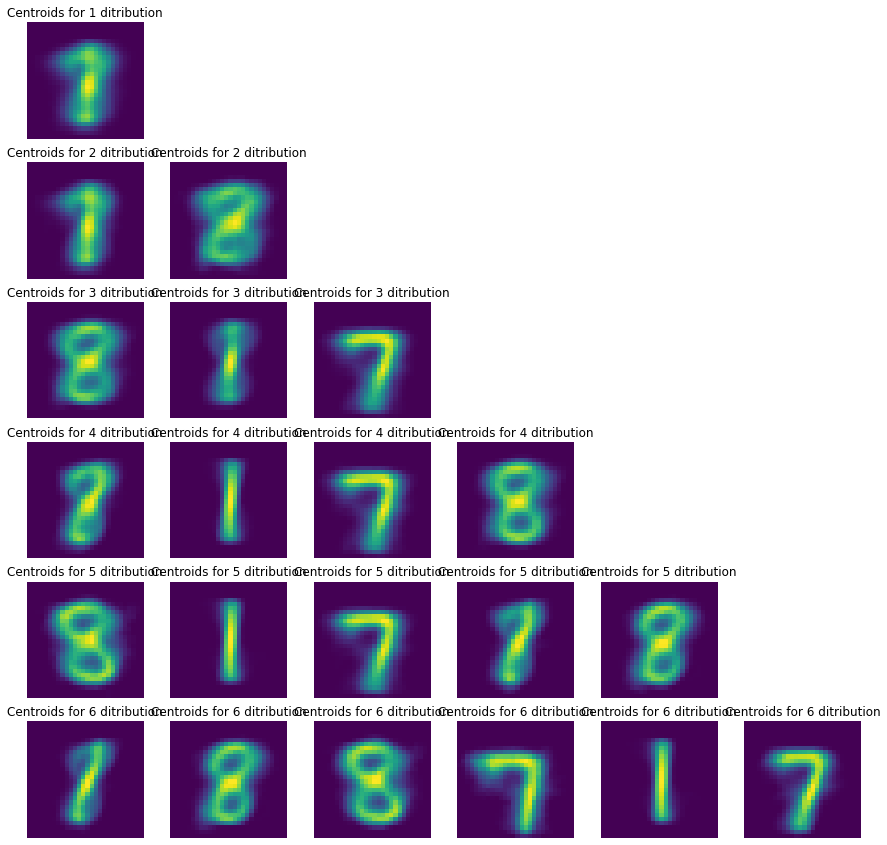

In [40]:
plt.figure(figsize = (15,15))
gaussianDigit = GaussianMixture(n_components=3, covariance_type='diag') 
gaussianDigit_fit=gaussianDigit.fit(digit)
yGaussianDigit = gaussianDigit.predict(digit)
gaussianDigit_fit=gaussianDigit.fit(digit)
for ligne in range(6):
    gaussianDigit = GaussianMixture(n_components=(ligne+1), covariance_type='diag') 
    gaussianDigit_fit=gaussianDigit.fit(digit)
    centroidsGaussianDigit = gaussianDigit.means_
    #print(np.shape(centroidsGaussianDigit))
    #digitReshape=clusterDigit.reshape(centroidsGaussianDigit, 28, 28)
    #print(np.shape(clusterDigit))
    for colonne, centroid in enumerate(centroidsGaussianDigit):
        plt.subplot(6, 6, (ligne)*6+1+colonne)
        plt.imshow(centroid.reshape(28, 28))
        plt.axis("off")
        titre ='Centroids for '+str(ligne+1)+' ditribution'
        pl.title(titre)
        
        

**comment :** I print all the centroids for different number of clusters. Before k=3, it is not interesting because the algorithm has not enough clusters in order to put each type of number in a cluster (with their own label). After, we could see  it is creating clustering for subdivision of type of number for each class. The more we have number of clusters, the more the numbers are looking good. However, like we have 3 labels, the logical choice should be 3, but it is not looking really good. With k=5, all numbers begin to look really good.

4. Compute the log probability of the samples for the estimated density (model.score_samples(x)). Recover the samples with the smallest score (probability) and plot them. They can be considered as outliers for the distribution (least probable samples). Wan you see why?

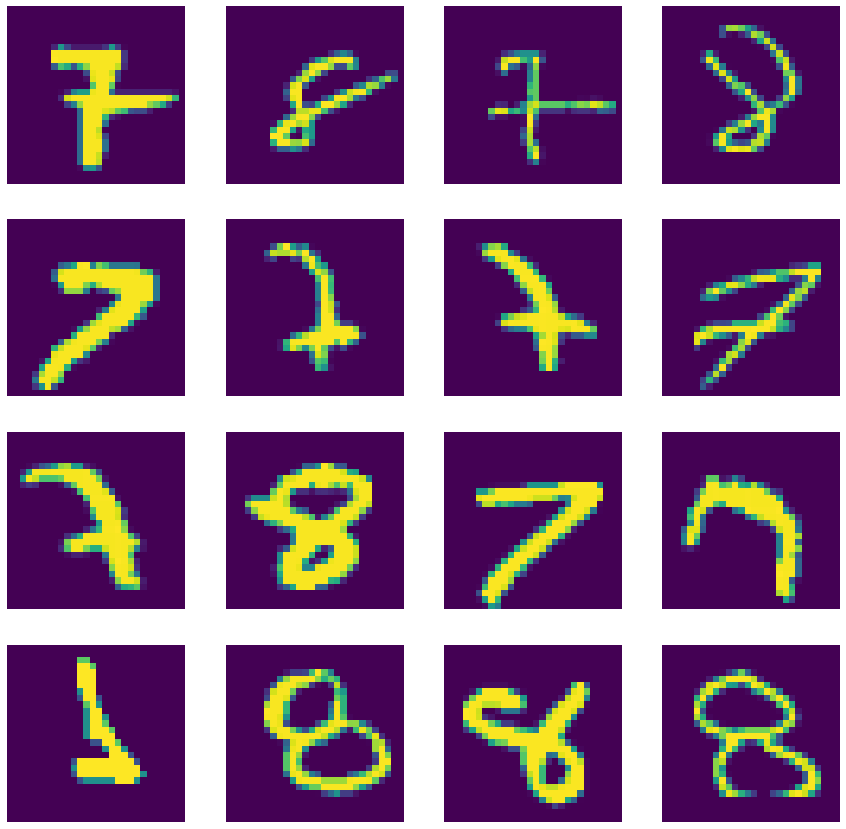

In [41]:
gaussianDigit = GaussianMixture(n_components=3, covariance_type='diag') 
gaussianDigit_fit=gaussianDigit.fit(digit)
scores_digit = gaussianDigit.score_samples(digit)
outliers_digits = np.argsort(scores_digit)[:16]

plt.figure(figsize=(15,15))
for i, digitToPrint in enumerate(outliers_digits):
    plt.subplot(4, 4, i+1)
    plt.imshow(digit[digitToPrint].reshape(28, 28))
    plt.axis("off")
   

**comment :**  It is a really interesting way for spotting outliers. Here we have the pictures that looks like the less from our 3 distributions. So it is really rare type of digit representation that could clearly be considerer outliers. Here, we can clearly see that this numbers are for the majority not "usual" sample from the orignal dataset.

5. Digits dataset : Estimate the labels of the samples (model.predict) and compute the clustering rand score. Is it better than Kmeans? Why?

In [42]:
print("rand score :",rand_score(yGaussianDigit,np.transpose(y)[0]))
print("adjusted rand score :",adjusted_rand_score(yGaussianDigit,np.transpose(y)[0]))

rand score : 0.7342272626195241
adjusted rand score : 0.42280128468584705


**comment :**  We achieved as expected lower performance than before. Adjusted rand score has really decreased compare to Kmeans. For this dataset, the GMM is really less performance.

6. (Bonus) generate samples from the distribution (model.samples) and plot them. Could you differen- tiate them from real data?

(-0.5, 27.5, 27.5, -0.5)

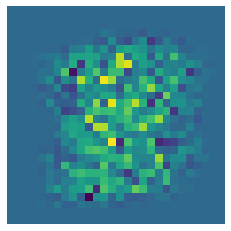

In [43]:
plt.imshow(gaussianDigit.sample()[0][0].reshape(28, 28))
plt.axis("off")

**comment :**  Here we have an image with a lot of noise. We cannot clearly see an 8, and it doesn't look at all of an image from the original dataset. It is due that each pixel has a distribution, so each pixel that hasn't a 0 probability to exist has a chance to be drawn. This is why we don't have a sharp line like the numbers in our dataset.

# 4 Dimensionality reduction

# 4.1 Linear Projection : Principal Component Analysis

1. Compute the covariance matrix of the data and plot it as an image (np.cov(x.T)). Interpret the structure of the covariance matrix using your knowledge of the data (relations between features).

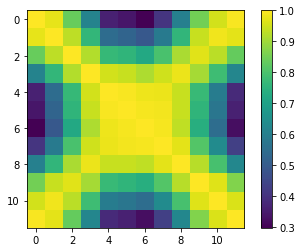

In [44]:
plt.imshow(np.corrcoef(temperatureData.T))
plt.colorbar()

**comment :**  Here we have plot the corelation matrix, we wan see the diagonal is yellow, it is normal. And we also have the other diagoal that is yellow, it is aslo expected because months are a cycle and they evolve in the same direction with cities.

2. Compute the PCA (keeping all dimensions with n_components=None) for the data and recover the explained variance ratio (stored in model.explained_variance_ratio_) that is the proportion of energy in each principal direction stored. Plot it and discuss the quantity of information preserved when projecting on p = 2 dimensions.

In [45]:
pca = PCA(None)
pca_fit = pca.fit_transform(temperatureData.T) 
components = pca.components_.T

In [46]:
pca.explained_variance_ratio_

array([9.96531751e-01, 2.67287642e-03, 3.84000152e-04, 1.64998021e-04,
       1.19685144e-04, 6.96742872e-05, 2.85546198e-05, 1.46815226e-05,
       8.69189547e-06, 4.24098181e-06, 8.45969074e-07, 1.24910194e-32])

Text(0.5, 1.0, '% of explained variance with the number of compenents')

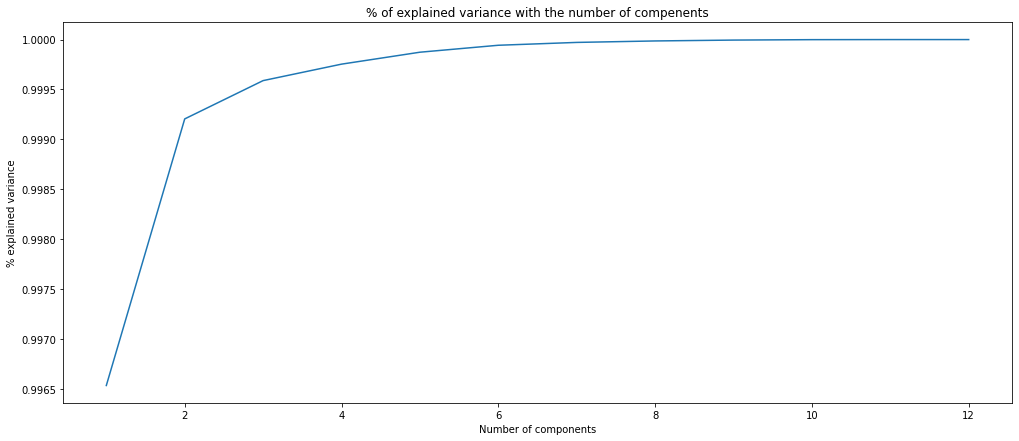

In [47]:
plt.figure(figsize=(17,7))
x_Axis = np.linspace(1, 12, num=12)
plt.plot(x_Axis,pca.explained_variance_ratio_.cumsum())
pl.xlabel('Number of components')
pl.ylabel('% explained variance')
plt.title("% of explained variance with the number of compenents")

**comment :**  We can see with only one composant, we already have really good explained variance (0,9965), this is due that data are really well structured and we have a small dataset I think (not sure)

In [48]:
pca = PCA(2)
pca.fit(temperatureData)
components = pca.transform(temperatureData)

3. Project the samples in p = 2 dimensions and plot the projected samples (model.transform(x)). For temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)) for a better interpretation. For the digits dataset, color the samples with their class in the scatterplot. Interpret the relations between the samples, what information is preserved and is it correlated to what your know about the samples (geographic position or true class) ?


[]

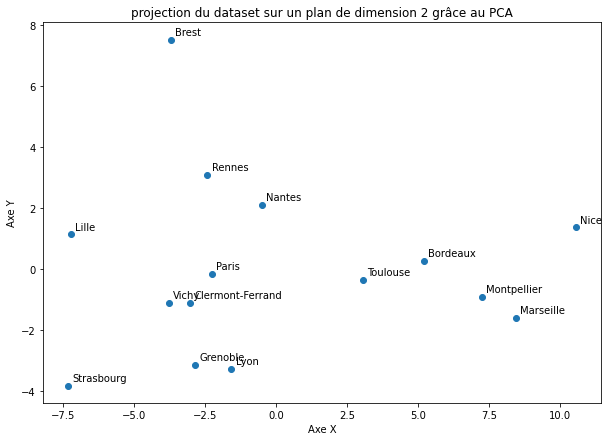

In [49]:
x_axis=components[:,1]
y_axis=components[:,0]
lat = x_axis
long = y_axis
pl.figure(figsize = (10,7))
plt.scatter(long,lat)
pl.title('projection du dataset sur un plan de dimension 2 grâce au PCA')
pl.xlabel('Axe X')
pl.ylabel('Axe Y')
for i in range(15):
    plt.annotate(villes[i], (long[i], lat[i]),xytext = (long[i] + 0.15, lat[i] +0.15))
plt.plot()

**comment :**  We can clearly see that cities are gathered by their localisation. For example, in the right part of this graph, we have all the south city. It is really impressive how PCA is working well!

4. Get the the two first principal directions (model.components_) from the model. Plot them and interpret them. What is the impact of moving along those direction in the original space?

Text(0, 0.5, 'Température (°C)')

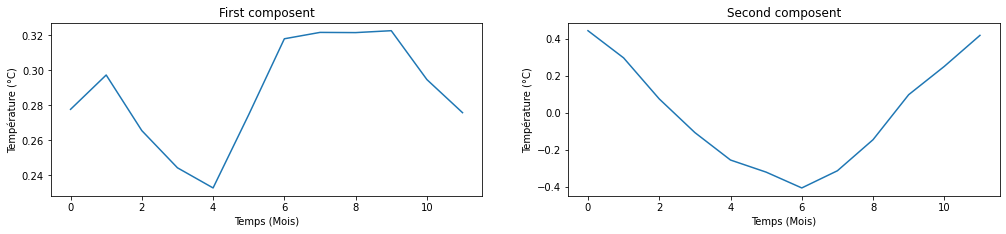

In [51]:
composent=pca.components_

plt.figure(figsize=(17,7))

plt.subplot(2, 2, 1)
plt.plot(composent[0])
pl.title("First composent")
pl.xlabel('Temps (Mois)')
pl.ylabel('Température (°C)')
#plt.legend()

plt.subplot(2, 2, 2)
plt.plot(composent[1])
pl.title("Second composent")
pl.xlabel('Temps (Mois)')
pl.ylabel('Température (°C)')
#plt.scatter(features,temperatureData.mean(axis=0), label ="Moyenne",c="red")
#plt.legend()


**comment :**  As interpretation of the two composants, I do the hypothesis that the first component is a kind of mean of all months. The second could maybe be the differnece between seasons or something like that, i'm really not sure about this second part of my answer.

5. Reconstruct the data from the projected samples (model.inverse_transform(xp)) for different sub- space dimension p. For a few samples in the dataset plot, the sample and its reconstruction. Is it still recognizable? Look at the impact of p on the quality of reconstruction.

In [52]:
reconstructionDataset = pca.inverse_transform(components)

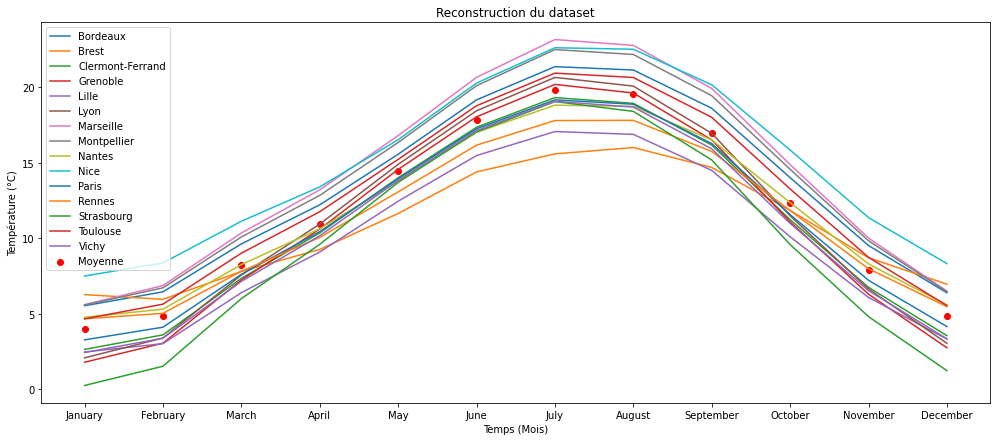

In [53]:
plt.figure(figsize=(17,7))
plt.plot(features,np.transpose(reconstructionDataset),label = villes)
pl.title("Reconstruction du dataset")
pl.xlabel('Temps (Mois)')
pl.ylabel('Température (°C)')
plt.scatter(features,temperatureData.mean(axis=0), label ="Moyenne",c="red")
plt.legend()

**comment :**  As expected, the reconstruction of the dataset is really good, it is really closed from the reality. This result was expected because we have near of 100% of the variance that is explained with two components. But let see with some specific cities

In [54]:
reconstructionDataset[:2]

array([[ 5.53625441,  6.45941977,  9.63526953, 12.22316389, 15.57727051,
        19.17782954, 21.38084346, 21.15775314, 18.62169059, 14.02513192,
         9.52700996,  6.39301414],
       [ 6.27689171,  5.96075432,  7.81152252,  9.26998653, 11.65031439,
        14.40419066, 15.60196309, 16.01983848, 14.70201096, 11.85874697,
         8.71799665,  6.96769743]])

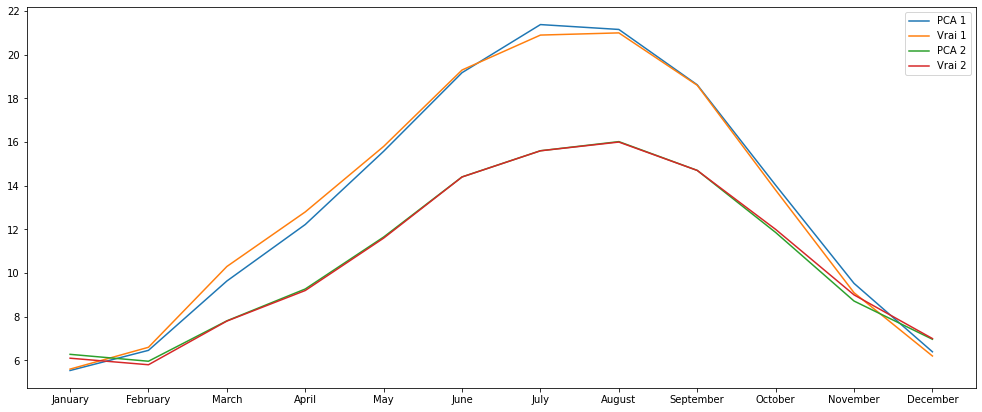

In [55]:
plt.figure(figsize=(17,7))

plt.plot(features,reconstructionDataset[0],label="PCA 1")
plt.plot(features,temperatureData[0],label="Vrai 1")
plt.plot(features,reconstructionDataset[1],label="PCA 2")
plt.plot(features,temperatureData[1],label="Vrai 2")
plt.legend()

**comment :**  Here, for the two first cities, the reconstruction is almost perfect, it is really impresive!

6. (Bonus) Estimate and visualize other linear modeling methods such as NMF that can be used on positive of the data.

### Digit

1. Compute the covariance matrix of the data and plot it as an image (np.cov(x.T)). Interpret the structure of the covariance matrix using your knowledge of the data (relations between features).

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


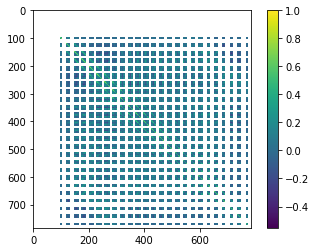

In [56]:
plt.imshow(np.corrcoef(digit.T))
plt.colorbar()

**comment :**  Here, like some points are always black, we can't compute correlation because these pixels have a variance of 0.

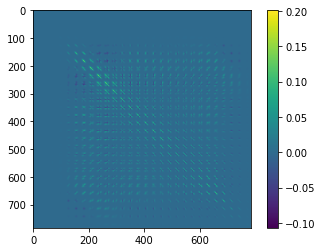

In [57]:
cov_temp=np.cov(digit.T)
plt.imshow(cov_temp)
plt.colorbar()

**comment :**  So I printed the variance matrix. To be honest, it is really hard to interpret something because this is a reprensentation of the 784 pixels line by line. If we would interpret something, it would be better to create a 3 dimensions grpah, with the image as base and the variance value for Z axis

Text(0.5, 1.0, 'Variance (diagonal of the covariance matrix) of the digits dataset')

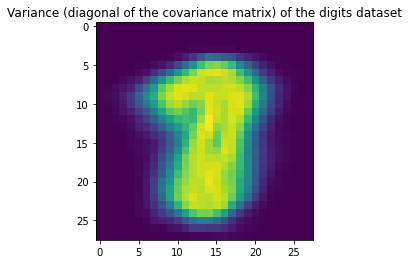

In [58]:
 # covariance of the data
sigma = np.cov(digit.T)
# variance (=diagonal of the covariance matrix) of the data
var = np.diag(sigma)


pl.imshow(var.reshape(28, 28))
pl.title('Variance (diagonal of the covariance matrix) of the digits dataset')

**comment :**  Now this image can be easily interpreted. As expected with the previous obeservation, the variance is in the center of the image, in the border, we have 0 variance.

2. Compute the PCA (keeping all dimensions with n_components=None) for the data and recover the explained variance ratio (stored in model.explained_variance_ratio_) that is the proportion of energy in each principal direction stored. Plot it and discuss the quantity of information preserved when projecting on p = 2 dimensions.

In [59]:
pca = PCA(None)
pca_fit = pca.fit_transform(digit) 
components = pca.components_

% of explained variance with the number of compenents  [0.1484568  0.2584391  0.32317896 0.37715885 0.42056717]


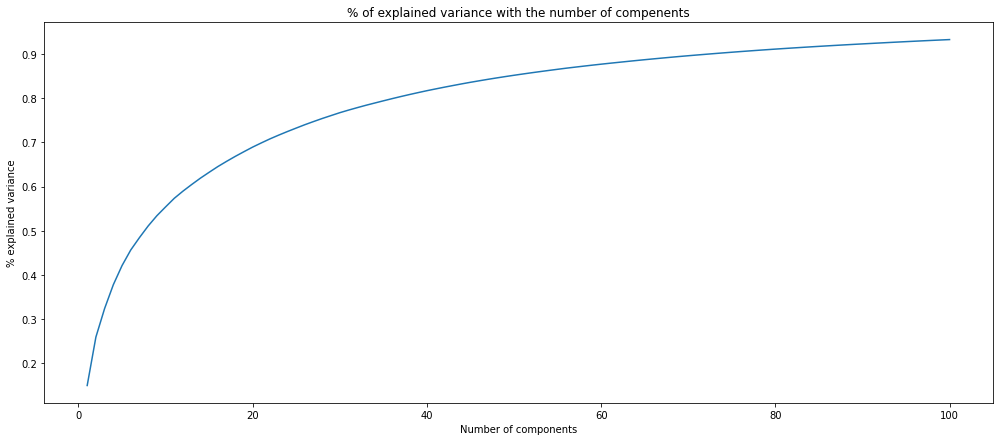

In [60]:
plt.figure(figsize=(17,7))
x_Axis = np.linspace(1, 100, num=100)
plt.plot(x_Axis,pca.explained_variance_ratio_[:100].cumsum())
pl.xlabel('Number of components')
pl.ylabel('% explained variance')
plt.title("% of explained variance with the number of compenents")
print("% of explained variance with the number of compenents ",pca.explained_variance_ratio_[:5].cumsum())

**comment :**  Here I print the % of variance explained by the first 100 compenents of PCA. We can see that with two compenents, we only have 25% of the variance explained. This is totaly normal because the dataset is a lot more complex than the previous one. Indeed, here we have 784 features and 1500 pictures. With only 2 compoenents, we are really losing a lot of information.

3. Project the samples in p = 2 dimensions and plot the projected samples (model.transform(x)). For temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)) for a better interpretation. For the digits dataset, color the samples with their class in the scatterplot. Interpret the relations between the samples, what information is preserved and is it correlated to what your know about the samples (geographic position or true class) ?


In [61]:
pca = PCA(2)
pca.fit(digit)
components = pca.transform(digit)

Text(0, 0.5, 'Axe Y')

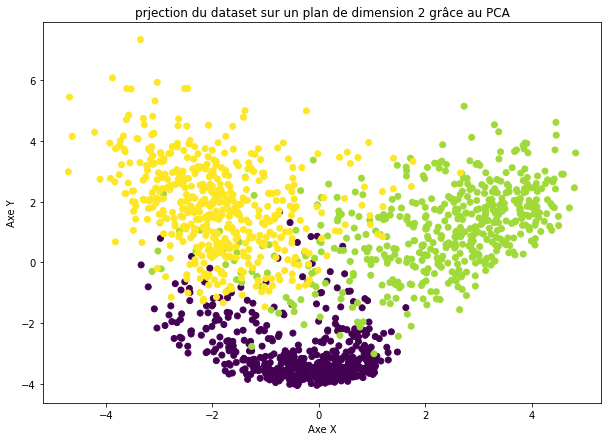

In [62]:
x_axis=components[:,0]
y_axis=components[:,1]
lat = x_axis
long = y_axis
pl.figure(figsize = (10,7))
plt.scatter(long,lat,c=y)
pl.title('prjection du dataset sur un plan de dimension 2 grâce au PCA')
pl.xlabel('Axe X')
pl.ylabel('Axe Y')


**comment :**  This graph is really interesting because we can really see 3 clusters. It is really impresive because we only have only two points instead of 784. However this clustering is not really good, there is a lot of overlap in clusters, this is due to the really poor variance explained.

4. Get the the two first principal directions (model.components_) from the model. Plot them and interpret them. What is the impact of moving along those direction in the original space?

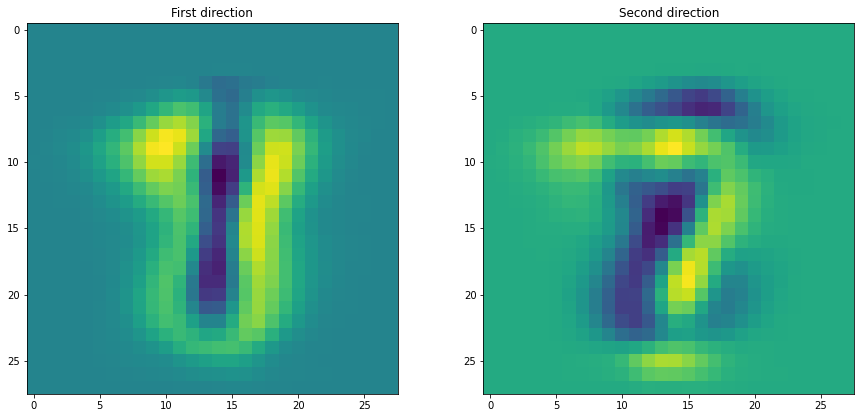

In [63]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.title('First direction')
plt.imshow(pca.components_[0].reshape(28, 28))
plt.subplot(2, 2, 2)
plt.title('Second direction')
plt.imshow(pca.components_[1].reshape(28, 28))
plt.show()

**comment :**  Here we can see that the first direction is a 8 minus a 1 and the second is a 7 minus a 8. With this two configurations, we can identify nearly each digit.

5. Reconstruct the data from the projected samples (model.inverse_transform(xp)) for different sub- space dimension p. For a few samples in the dataset plot, the sample and its reconstruction. Is it still recognizable? Look at the impact of p on the quality of reconstruction.

In [64]:
reconstructionDataset = pca.inverse_transform(components)

Text(0.5, 1.0, 'Recontstructionn image for class 8')

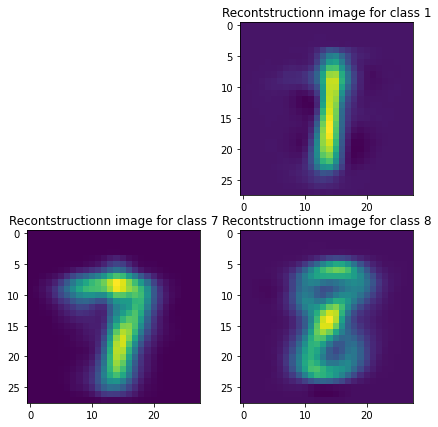

In [65]:
plt.figure(figsize = (7,7))

plt.subplot(2, 2, 2)
plt.imshow(reconstructionDataset[3].reshape(28, 28))
plt.title('Recontstructionn image for class 1')
plt.subplot(2, 2, 3)
plt.imshow(reconstructionDataset[600].reshape(28, 28))
plt.title('Recontstructionn image for class 7')
plt.subplot(2, 2, 4)
plt.imshow(reconstructionDataset[1200].reshape(28, 28))

plt.title('Recontstructionn image for class 8')

**comment :**  The reconstruction of the dataset is really blurry, it is expected because we have a really low variance. But we can easily guess what number is represented.

6. (Bonus) Estimate and visualize other linear modeling methods such as NMF that can be used on positive of the data.

# 4.2 Manifold Learning : TSNE

1. Compute the TSNE embedding of the data for in p = 2 for both datasets (sklearn.manifold.TSNE).

In [66]:
temper_embedded = TSNE(n_components=2).fit_transform(temperatureData)
temper_embedded

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 246.04285 , -267.29816 ],
       [ 718.7786  , -230.2855  ],
       [-415.3277  ,  227.93542 ],
       [-192.55226 , -264.86496 ],
       [ 157.18408 ,  836.7982  ],
       [-301.70102 ,  635.3571  ],
       [-435.64478 , -608.5051  ],
       [  41.102684, -672.7462  ],
       [  96.90212 ,  417.15256 ],
       [ 842.9461  ,  209.79445 ],
       [ -22.081537,   65.28615 ],
       [-638.1128  , -133.90189 ],
       [ 506.08813 , -637.1729  ],
       [ 534.92554 ,  549.5488  ],
       [ 403.3857  ,  110.061295]], dtype=float32)

2. Project the samples and plot them. For temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)). For the digits dataset, color the samples with their class in the scatterplot.


[]

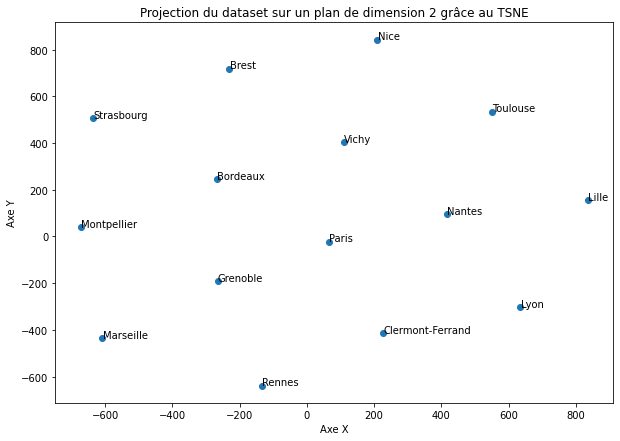

In [67]:
x_axis=temper_embedded[:,0]
y_axis=temper_embedded[:,1]
lat = x_axis
long = y_axis
pl.figure(figsize = (10,7))
plt.scatter(long,lat)
pl.title('Projection du dataset sur un plan de dimension 2 grâce au TSNE')
pl.xlabel('Axe X')
pl.ylabel('Axe Y')
for i in range(15):
    plt.annotate(villes[i], (long[i], lat[i]),xytext = (long[i] + 0.35, lat[i] +0.35))
plt.plot()

**comment :**  With this algorithm, we have a map where all cities are equi-distant and with no order. It is really not good. This is due to the perplexity that is really too high, let see next part !

3. What is the effect of the perplexity parameter? Does the embedding recover geographical relations for the temperature dataset? Is the embedding more discriminant in 2D for the digits dataset than the ACP?

In [68]:
complexity_list=[1,2,5,10,20,30]

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' 

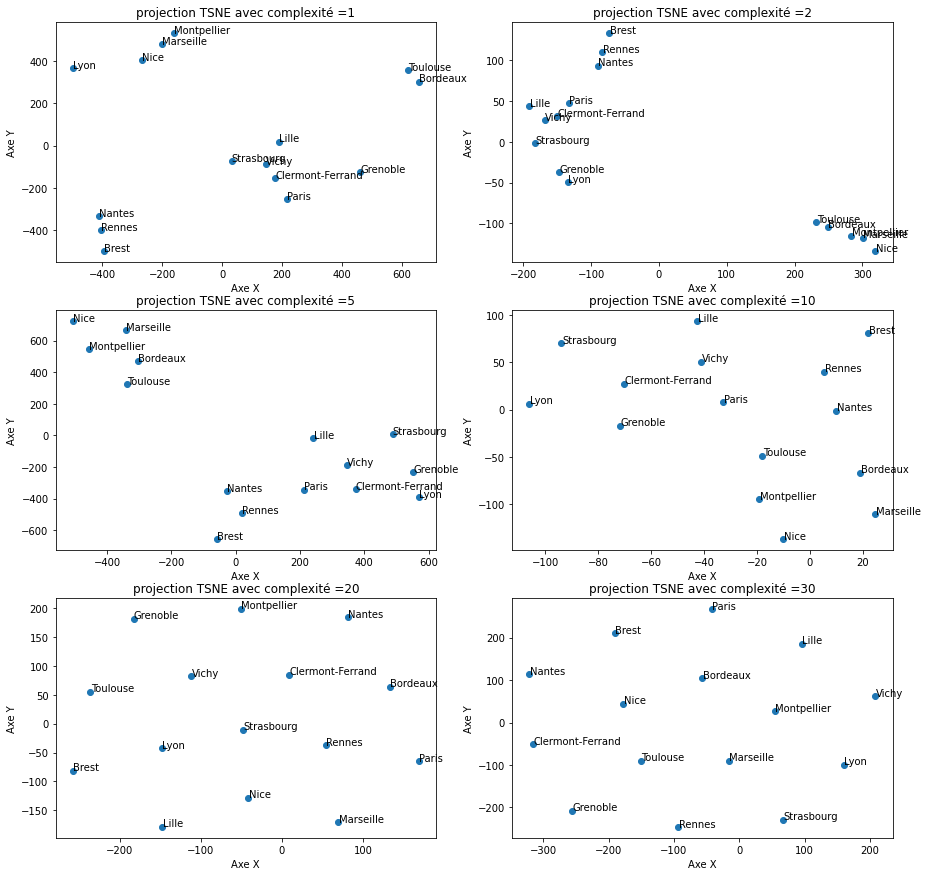

In [69]:
pl.figure(figsize = (15,15))

for i, complexity in enumerate(complexity_list):
    plt.subplot(3, 2, i+1)
    model_Temper2 = TSNE(n_components=2,perplexity=complexity) 
    temper_embedded2=model_Temper2.fit_transform(temperatureData) 
    x_axis=temper_embedded2[:,0]
    y_axis=temper_embedded2[:,1]
    lat = x_axis
    long = y_axis
    plt.scatter(long,lat)
    pl.title('projection TSNE avec complexité ='+str(complexity))
    pl.xlabel('Axe X')
    pl.ylabel('Axe Y')
    for i in range(15):
        plt.annotate(villes[i], (long[i], lat[i]),xytext = (long[i] + 0.35, lat[i] +0.35))
    plt.plot()

**comment :**  We can see with a complexity lower than 10, we are finding again our clusters. So it is working well in order to refind geographical similarity in our dataset.

### Digit

1. Compute the TSNE embedding of the data for in p = 2 for both datasets (sklearn.manifold.TSNE).

In [80]:
digit_embedded = TSNE(n_components=2).fit_transform(digit)
digit_embedded

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  0.29982227,   6.682208  ],
       [ -3.7523704 ,   7.940842  ],
       [-14.91812   ,  32.315037  ],
       ...,
       [-25.011404  , -16.928495  ],
       [ -8.515051  , -22.873749  ],
       [-28.271732  , -24.456816  ]], dtype=float32)

2. Project the samples and plot them. For temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)). For the digits dataset, color the samples with their class in the scatterplot.


Text(0, 0.5, 'Axe Y')

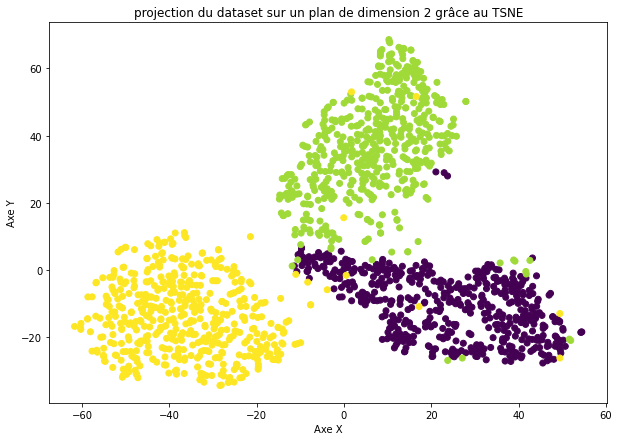

In [81]:
x_axis=digit_embedded[:,0]
y_axis=digit_embedded[:,1]
lat = x_axis
long = y_axis
pl.figure(figsize = (10,7))
plt.scatter(long,lat,c=y)
pl.title('projection du dataset sur un plan de dimension 2 grâce au TSNE')
pl.xlabel('Axe X')
pl.ylabel('Axe Y')


**comment :**  Here, we can clearly see that the dataset is clealy clustered. This default value of perplexity seems to be good for this dataset

3. What is the effect of the perplexity parameter? Does the embedding recover geographical relations for the temperature dataset? Is the embedding more discriminant in 2D for the digits dataset than the ACP?

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' 

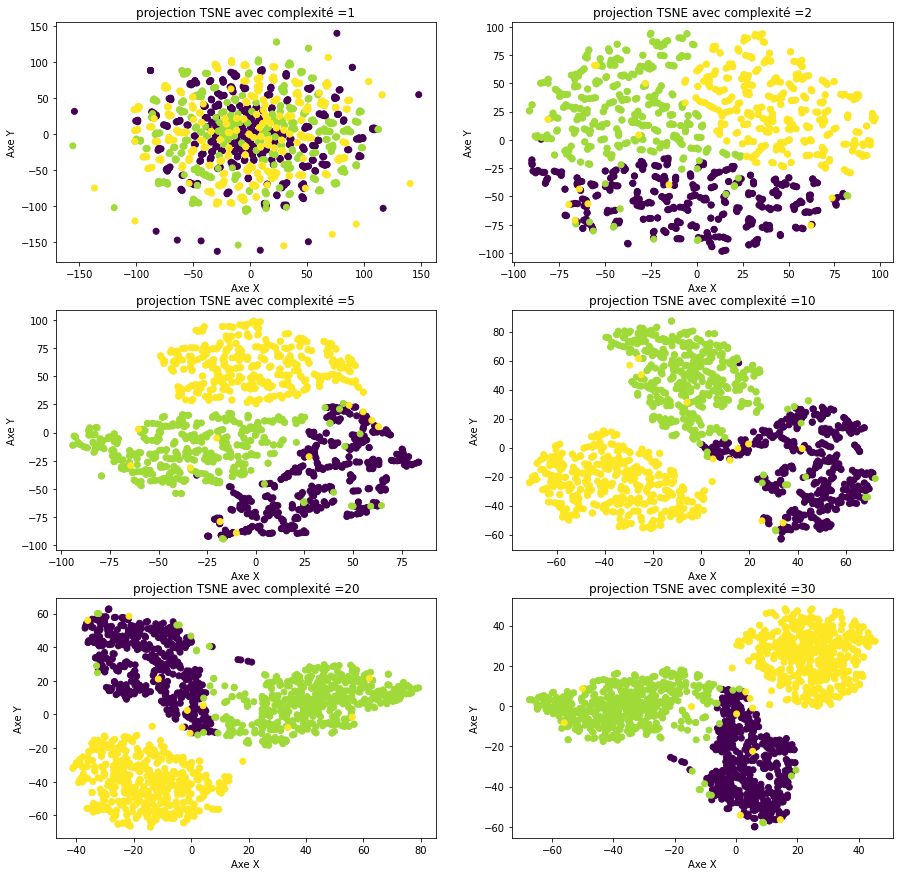

In [72]:
pl.figure(figsize = (15,15))

for i, complexity in enumerate(complexity_list):
    plt.subplot(3, 2, i+1)
    model_Temper2 = TSNE(n_components=2,perplexity=complexity) 
    temper_embedded2=model_Temper2.fit_transform(digit) 
    x_axis=temper_embedded2[:,0]
    y_axis=temper_embedded2[:,1]
    lat = x_axis
    long = y_axis
    plt.scatter(long,lat,c=y)
    pl.title('projection TSNE avec complexité ='+str(complexity))
    pl.xlabel('Axe X')
    pl.ylabel('Axe Y')
    

**comment :**  Here, we can clearly see more complexity is high, more we have a good clustering effect (at least with complexity we have choose, if we increase too much we are going to loose these shapes like 
the other dataset). When we decrease the perplexity, we are getting really strange form that doesn't represent our reality, we don't have to give too small perplexity.

The end of the report must contain a personal discussion about the session (what was hard to understand and implement, how you would do it next time, what was new, discussion of relation with the course, personal discussion about how to use these tools in a professional setting, . . . ).

1) what was hard to understand and implement

**comment :**  The course is really clear. I have really learnt a lot things that is going to be useful in my future. I really enjoyed implemeting the "theorical" stuff and play a bit with it. I think it has really helped me too really understand the alogorithms we are using. The implementation part was a bit hard, because I didn't practise code from a long time, but it was a really good "decrassage". Working with the image dataset was at the begining more difficult thant 1D dataset because I neved worked with this type of data. 

 discussion of relation with the course, personal discussion about how to use these tools in a professional setting

**comment :** I had already used in other projects some of the most popular algorithms like PCA and Kmeans we have used in this lab. But I discovered  some new algoritms : TSNE and GMM. This lab (and this course more generaly) show me how large the data science field is. The thing that surprised me the most was how we find outliers with the GMM model. In this TP, I also understand that one really important part of the work it is to describe and understand the dataset. I have see a lot of technique (variance, mean, how to work with pictures...). I think this step is really important for us as a data scientist, but also for the company which we are working for.

**comment :**  This course (slides+notebook) is going to be really useful for my future job and interviews because the slides are a really good overview of all about Machine learning. And in the notebooks, I'm really learning how to implement and understanding the work of a data scientist isn't just about running lines of code, but about understanding the data, the problem, find the good algorithm and do some experimentations!